In [5]:
import albumentations as A
import numpy as np
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import os


In [15]:
def get_transform():
    transform = A.Compose([
        A.HorizontalFlip(p=1),
        A.Rotate(limit=60, p=1),
        A.Resize(width=100, height=150),
    ], bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))
    return transform

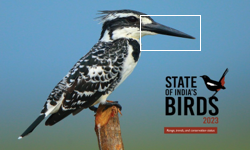

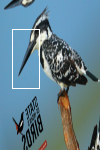

In [21]:
if __name__=="__main__":
    img_path = r'im_1.jpg'
    im = Image.open(img_path)
    img = im.resize((250, 150))
    image = np.array(img)
    
    bbox = [140, 15, 200, 50] # format xmin, ymin, xmax, ymax
    draw = ImageDraw.Draw(img)
    draw.rectangle(bbox, fill=None)
    display(img)
    
    transform = get_transform()
    transformed = transform(image=image, bboxes=[bbox], category_ids=[0])
    img_transformed = transformed['image']
    bbox_transformed = transformed['bboxes'][0]
    
    im_t = Image.fromarray(img_transformed)
    draw = ImageDraw.Draw(im_t)
    draw.rectangle(bbox_transformed, fill=None)
    display(im_t)
    
    

In [22]:
im_t.size

(100, 150)